### Trade Journal 


This is a simple journal I plan on using and improving throughout 2023 to track trading performance. The python script pulls a csv file and entries are added manually in excel. 


**Done 

* Performance metrics caluclations 
    * Win Rate
    * Average win/loss
    * Average Risk/Reward Ratio
    


**In progress 

* API requests from brokers directly for column entries instead of entering manually (Althought manual entering is good as a double check on trade plans) 
* Interactive Dash board  (Filter by date, 
* Add more performance metrics 






In [14]:
import pandas as pd
import numpy as np 
import time 
import matplotlib.pyplot as plt


In [15]:
#Import file 
df = pd.read_csv("Template_Trade_Entries.csv")

In [16]:
df.head()

,Date,Long/Short,Win/Loss,Symbol,Entry,Exit,Stop Loss,T1,T2,T3,Win Amount,Loss Amount,Unnamed: 12,Notes,Setup_Screenshot
0,2022-11-28,Long,0,LTC,73.89,73.03,73.03,76.3,NaN,NaN,0,5000,NaN,NaN,NaN


In [17]:
df = df.fillna(0)

In [18]:
df

,Date,Long/Short,Win/Loss,Symbol,Entry,Exit,Stop Loss,T1,T2,T3,Win Amount,Loss Amount,Unnamed: 12,Notes,Setup_Screenshot
0,2022-11-28,Long,0,LTC,73.89,73.03,73.03,76.3,0.0,0.0,0,5000,0.0,0.0,0.0


In [23]:
df.describe()

,Win/Loss,Entry,Exit,Stop Loss,T1,T2,T3,Win Amount,Loss Amount,Unnamed: 12,Notes,Setup_Screenshot
count,1.0,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
25%,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
50%,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
75%,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0
max,0.0,73.89,73.03,73.03,76.3,0.0,0.0,0.0,5000.0,0.0,0.0,0.0


In [24]:
## Performance metrics equations

# Calculate the total number of trades
n_trades = len(df)

# Calculate the number of winning trades
n_wins = df[df['Win/Loss'] == 1]['Win/Loss'].count()

# Calculate the number of losing trades
n_losses = df[df['Win/Loss'] == 0]['Win/Loss'].count()

# Calculate the win rate
win_rate = n_wins / n_trades

# Calculate the average win amount
avg_win = df[df['Win/Loss'] == 1]['Win Amount'].mean()

# Calculate the average loss amount
avg_loss =df[df['Win/Loss'] == 0]['Loss Amount'].mean()

# Calculate the risk-to-reward ratio
Average_risk_reward = avg_win / avg_loss


In [21]:
## Plotting metrics 

ValueError: 'label' must be of length 'x'

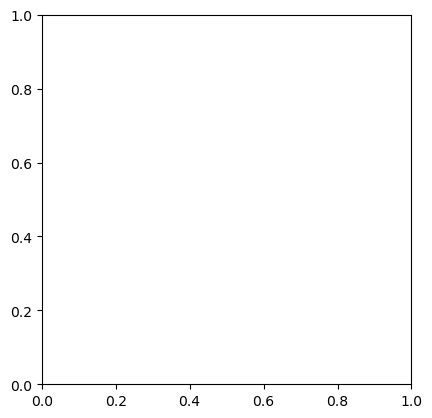

In [25]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
Win_loss_Rate_Plot = plt.pie(df.groupby('Win/Loss')['Win/Loss'].count(), labels = ['Loss Rate', 'Win Rate'], colors=['red', 'green'], autopct='%.1f%%')
# Print metrics
print(f"Number of trades: {n_trades}")
print(f"Number of wins: {n_wins}")
print(f"Number of losses: {n_losses}")
print(f"Win rate: {win_rate:.2%}")
print(f"Average win amount: {avg_win:.2f}")
print(f"Average loss amount: {avg_loss:.2f}")
print(f"Average RR ratio: {Average_risk_reward:.2}")